# Índice de contenidos
1. Antes de empezar:

2. Reto 1 - Importar y describir el conjunto de datos

    2.0.0.1 Explore el conjunto de datos con técnicas matemáticas y de visualización. ¿Qué encuentra?

3. Reto 2 - Limpieza y transformación de datos

4. Reto 3 - Preprocesamiento de datos

    4.0.0.1 Utilizaremos el StandardScaler de sklearn.preprocessing y escalaremos nuestros datos. Lea más sobre StandardScaler aquí.

5. Reto 4 - Agrupación de datos con K-Means

6. Reto 5 - Agrupación de datos con DBSCAN

7. Reto 6 - Comparar K-Means con DBSCAN

8. Reto adicional 2 - Cambiar el número de clusters de K-Means

9. Bonus Challenge 3 - Cambiar DBSCAN eps y min_samples

# Antes de empezar:
- Lee el archivo README.md
- Comenta todo lo que puedas y utiliza los recursos del archivo README.md
- ¡Feliz aprendizaje!

In [1]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings                                              
from sklearn.exceptions import DataConversionWarning          
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Desafío 1 - Importar y describir el conjunto de datos

En este laboratorio, utilizaremos un conjunto de datos que contiene información sobre las preferencias de los clientes. Analizaremos cuánto gasta cada cliente en un año en cada subcategoría de la tienda de comestibles e intentaremos encontrar similitudes mediante la agrupación.

El origen del conjunto de datos es [aquí](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [2]:
# loading the data: Wholesale customers data
customers = pd.read_csv("C:\\Users\\Ale\\Documents\\IronHack\\Git\\salidas\\Wholesale customers data.csv")
customers.head(5)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


#### Explora el conjunto de datos con técnicas matemáticas y de visualización. ¿Qué encuentras?

Lista de comprobación:

* ¿Qué significa cada columna?
* ¿Hay datos categóricos que convertir?
* ¿Hay que eliminar datos que faltan?
* Colinealidad de columnas: ¿hay correlaciones altas?
* Estadísticas descriptivas: ¿hay que eliminar algún valor atípico?
* Distribución de los datos por columnas: ¿está sesgada la distribución?
* Etc.

Información adicional: Hace más de un siglo, un economista italiano llamado Vilfredo Pareto descubrió que aproximadamente el 20% de los clientes representan el 80% de las ventas minoristas típicas. Esto se denomina [principio de Pareto](https://en.wikipedia.org/wiki/Pareto_principle). Compruebe si este conjunto de datos presenta esta característica.

In [3]:
# Your code here:
print(customers.info())
print(customers.describe().T)
print(customers.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB
None
                  count          mean           std   min      25%     50%  \
Channel           440.0      1.322727      0.468052   1.0     1.00     1.0   
Region            440.0      2.543182      0.774272   1.0     2.00     3.0   
Fresh             440.0  12000.297727  12647.328865   3.0  3127.75  8504.0   
Milk              440.0   5796.265909   7380.377175  55.0  1533.00  3627.0   
Grocery     

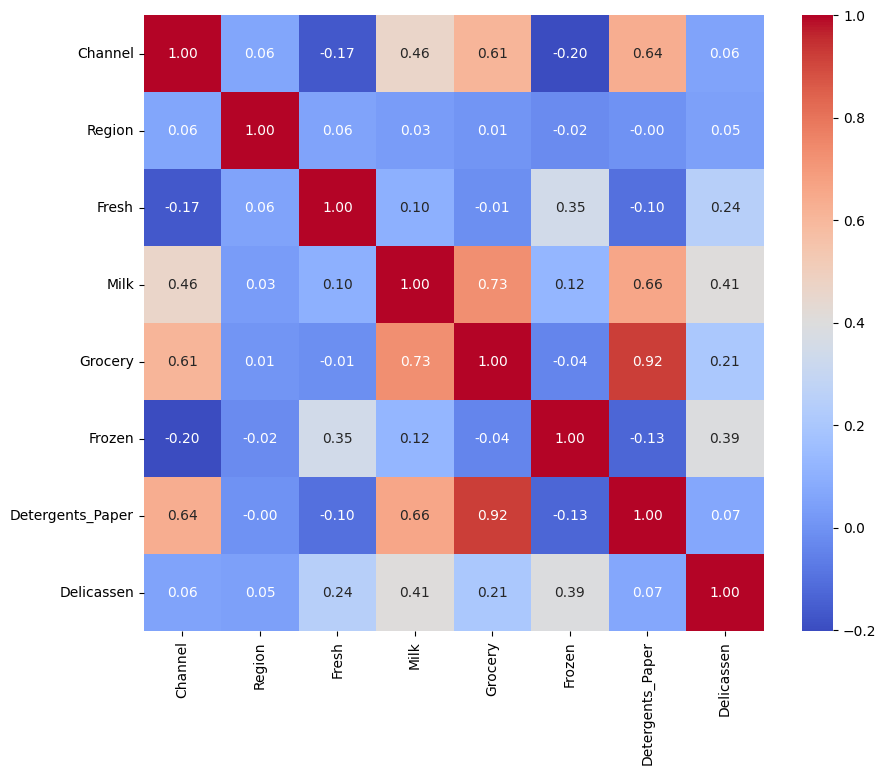

In [4]:
corr_matrix = customers.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

          Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   
min      1.000000    1.000000       3.000000     55.000000      3.000000   
25%      1.000000    2.000000    3127.750000   1533.000000   2153.000000   
50%      1.000000    3.000000    8504.000000   3627.000000   4755.500000   
75%      2.000000    3.000000   16933.750000   7190.250000  10655.750000   
max      2.000000    3.000000  112151.000000  73498.000000  92780.000000   

             Frozen  Detergents_Paper    Delicassen  
count    440.000000        440.000000    440.000000  
mean    3071.931818       2881.493182   1524.870455  
std     4854.673333       4767.854448   2820.105937  
min       25.000000          3.000000      3.000000  
25%      742.250000        256.750000    408.

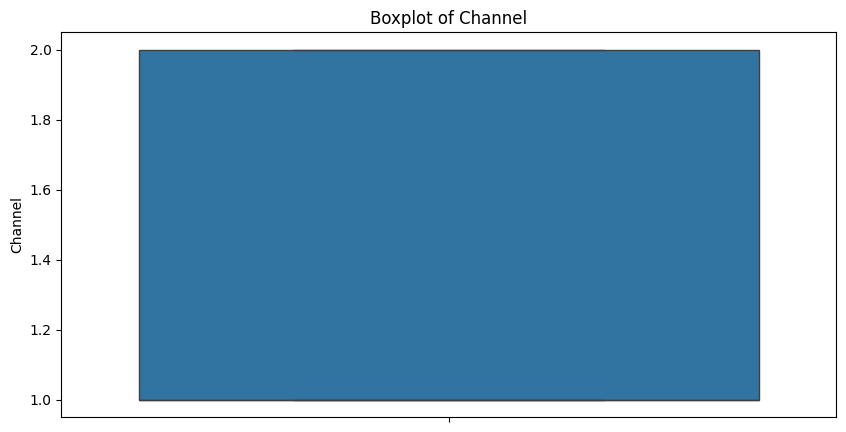

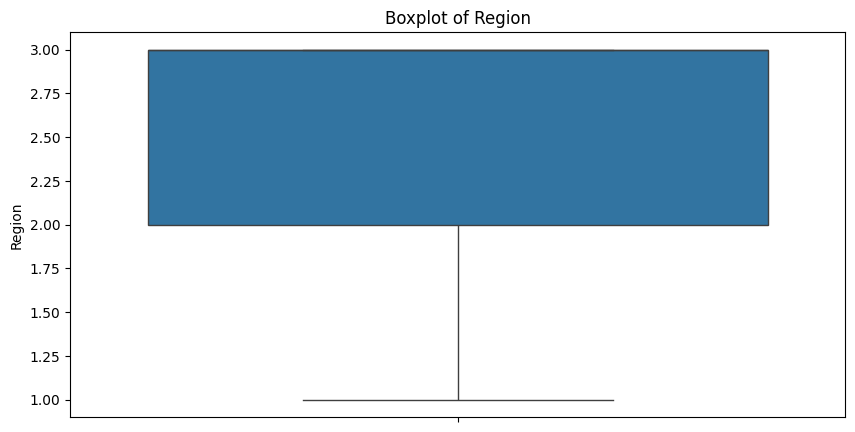

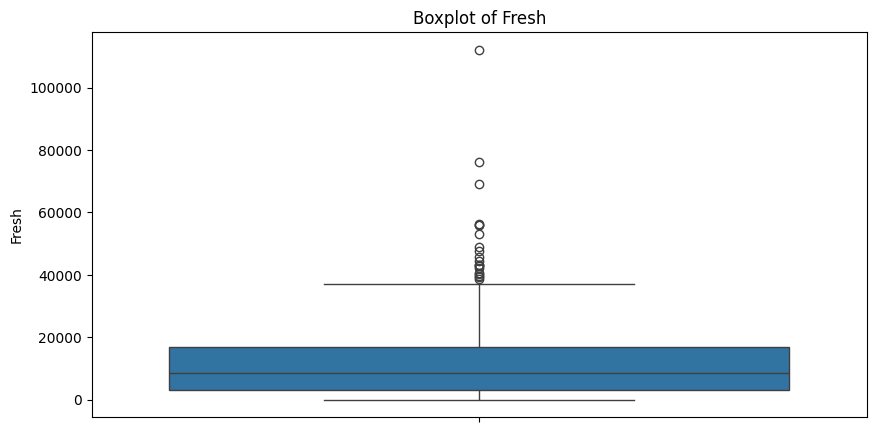

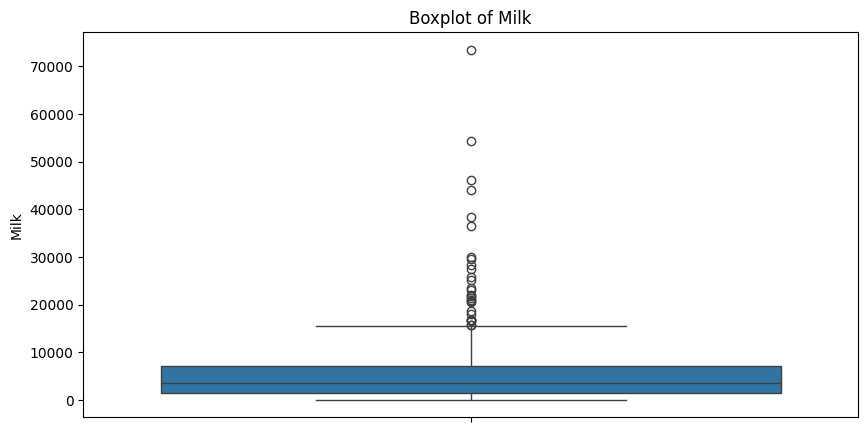

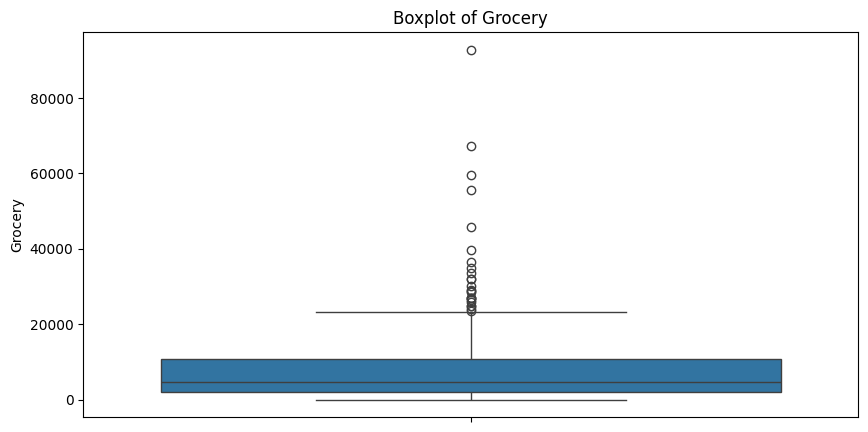

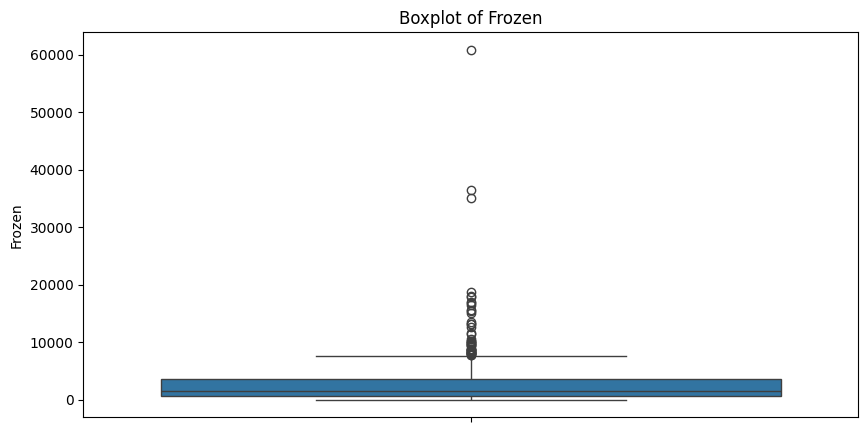

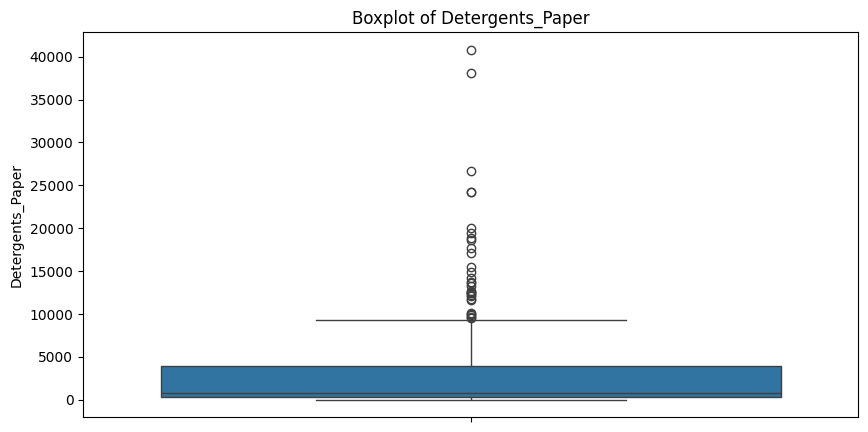

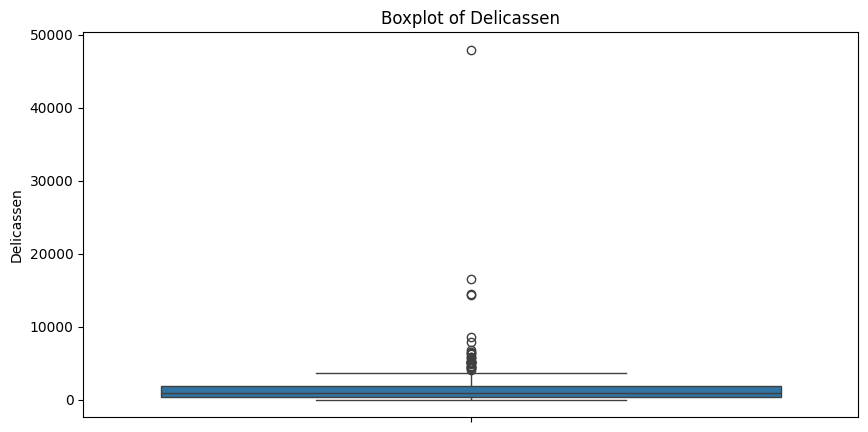

In [5]:
print(customers.describe())

for column in customers.columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(customers[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

In [6]:
# Eliminamos outliers de todas las columnas
Q1 = customers.quantile(0.25)
Q3 = customers.quantile(0.75)
IQR =  Q3 - Q1
outliers = ((customers < (Q1 - 1.5 * IQR)) | (customers > (Q3 + 1.5 * IQR)))
customers = customers[~outliers.any(axis=1)]

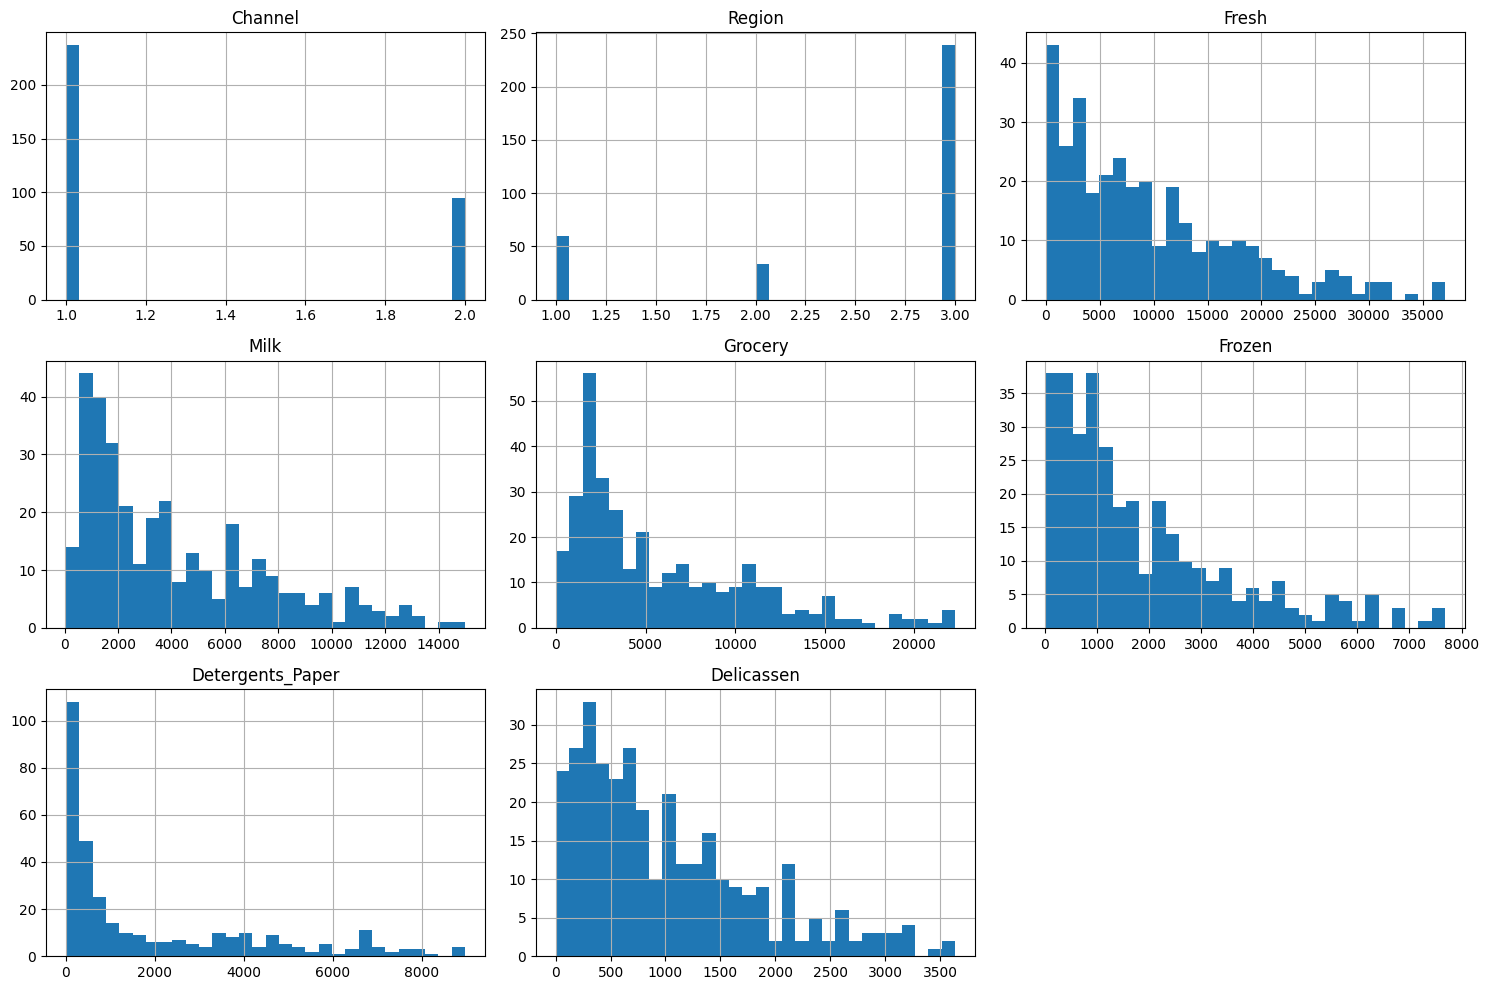

In [7]:
customers.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

**Tus observaciones aquí**

+ Frozen, Grocery, Milk y Detergents Paper tienen una gran ...
+ 
+ 
+ 



# Reto 2 - Limpieza y transformación de datos

Si tu conclusión del reto anterior es que los datos necesitan limpieza/transformación, hazlo en las celdas de abajo. Sin embargo, si su conclusión es que los datos no necesitan ser limpiados o transformados, no dudes en saltarte este reto. Si optas por esta última opción, explica los motivos.

In [8]:
# Your code here
#Lo hemos hecho en los apartados anteriores.


**Tus observaciones aquí**

+ Parece que...
+ 
+ 

# Reto 3 - Preprocesamiento de datos

Uno de los problemas del conjunto de datos es que los rangos de valores son notablemente diferentes en las distintas categorías (por ejemplo, `Fresh` y `Grocery` en comparación con `Detergents_Paper` y `Delicassen`). Si hiciste esta observación en el primer reto, ¡has hecho un gran trabajo! Esto significa que no sólo has completado las preguntas de bonificación en el anterior laboratorio de Aprendizaje Supervisado, sino que también has investigado en profundidad sobre [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). ¡Sigue trabajando así de bien!

Diversos rangos de valores en diferentes características podrían causar problemas en nuestra agrupación. La forma de reducir el problema es mediante el escalado de características. Volveremos a utilizar esta técnica con este conjunto de datos.

#### Utilizaremos el `StandardScaler` de `sklearn.preprocessing` y escalaremos nuestros datos. Lee más sobre `StandardScaler` [aquí](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*Después de escalar tus datos, asigna los datos transformados a una nueva variable `customers_scale`.

In [11]:
# Your import here:
from sklearn.preprocessing import StandardScaler

# # Your code here:
# customers_dummies = pd.get_dummies(customers, columns=['Channel', 'Region'], drop_first=True)
# customers_dummies
scaler = StandardScaler()
numerical_columns = customers_dummies.drop(['Channel_2', 'Region_2', 'Region_3'], axis=1).columns
scaled_numerical_data = scaler.fit_transform(customers_dummies[numerical_columns])
scaled_numerical_df = pd.DataFrame(scaled_numerical_data, columns=numerical_columns)
customers_scaled = pd.concat([scaled_numerical_df, customers_dummies[['Channel_2', 'Region_2', 'Region_3']].reset_index(drop=True)], axis=1)
print(customers_scaled.head())



      Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicassen  \
0  0.383041  1.652898  0.334978 -0.967004          0.305053    0.390465   
1 -0.305588  1.698756  0.733878 -0.059255          0.569139    0.922591   
2  0.456174 -0.866283 -0.328862  2.662821         -0.619462    0.937169   
3 -0.016491  1.236906 -0.148989 -0.701951         -0.069958    0.527749   
4  0.316411 -0.269838  0.218508 -0.811022          0.503864   -0.572949   

   Channel_2  Region_2  Region_3  
0       True     False      True  
1       True     False      True  
2      False     False      True  
3       True     False      True  
4       True     False      True  


# Reto 4 - Agrupación de datos con K-Means

Ahora vamos a agrupar los datos con K-Means primero. Inicia el modelo K-Means, luego ajusta tus datos escalados. En los datos devueltos por el método `.fit`, hay un atributo llamado `labels_` que es el número de cluster asignado a cada registro de datos. Lo que puede hacer es asignar estas etiquetas de nuevo a `customers` en una nueva columna llamada `customers['labels']`. Entonces verá los resultados de cluster de los datos originales.

In [12]:
from sklearn.cluster import KMeans

# Your code here:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(customers_scaled)
customers['labels'] = kmeans.labels_
print(customers.head())

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  \
0        2       3  12669  9656     7561     214              2674   
1        2       3   7057  9810     9568    1762              3293   
3        1       3  13265  1196     4221    6404               507   
5        2       3   9413  8259     5126     666              1795   
6        2       3  12126  3199     6975     480              3140   

   Delicassen  labels  
0        1338       0  
1        1776       0  
3        1788       1  
5        1451       0  
6         545       2  


### Viendo el elbow pododríamos escoger 2 como el número de clusters correctos

In [13]:
kmeans_2 = KMeans(n_clusters=2).fit(customers_scaled)

labels = kmeans_2.predict(customers_scaled)

clusters = kmeans_2.labels_.tolist()

In [14]:
customers['Label'] = clusters

Cuenta los valores en `labels`.

In [15]:
# Your code here:
customers['labels'].count()

332

# Reto 5 - Clustering de datos con DBSCAN

Ahora vamos a agrupar los datos utilizando DBSCAN. Utiliza `DBSCAN(eps=0.5)` para iniciar el modelo y, a continuación, ajusta los datos escalados. En los datos devueltos por el método `.fit`, asigna las `labels_` de nuevo a `customers['labels_DBSCAN']`. Ahora tus datos originales tienen dos etiquetas, una de K-Means y la otra de DBSCAN.

In [16]:
from sklearn.cluster import DBSCAN 

# Your code here
dbscan = DBSCAN(eps=0.5)
dbscan.fit(customers_scaled)
customers['labels_DBSCAN'] = dbscan.labels_
print(customers.head())

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  \
0        2       3  12669  9656     7561     214              2674   
1        2       3   7057  9810     9568    1762              3293   
3        1       3  13265  1196     4221    6404               507   
5        2       3   9413  8259     5126     666              1795   
6        2       3  12126  3199     6975     480              3140   

   Delicassen  labels  Label  labels_DBSCAN  
0        1338       0      0             -1  
1        1776       0      0             -1  
3        1788       1      1             -1  
5        1451       0      0             -1  
6         545       2      1             -1  


Cuenta los valores en `labels_DBSCAN`.

In [17]:
# Your code here
customers['labels_DBSCAN'].count()

332

# Reto 6 - Comparar K-Means con DBSCAN

Ahora queremos comparar visualmente cómo K-Means y DBSCAN han agrupado nuestros datos. Crearemos gráficos de dispersión para varias columnas. Para cada uno de los siguientes pares de columnas, traza un gráfico de dispersión utilizando `labels` y otro utilizando `labels_DBSCAN`. Ponlos uno al lado del otro para compararlos. ¿Qué algoritmo de agrupación tiene más sentido?

Columnas a visualizar:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualice `Detergentes_Papel` como X y `Leche` como Y mediante `labels` y `labels_DBSCAN` respectivamente

In [19]:
def plot(x,y,hue):
    sns.scatterplot(x=x, 
                    y=y,
                    hue=hue)
    plt.title('Detergents Paper vs Milk ')
    return plt.show();

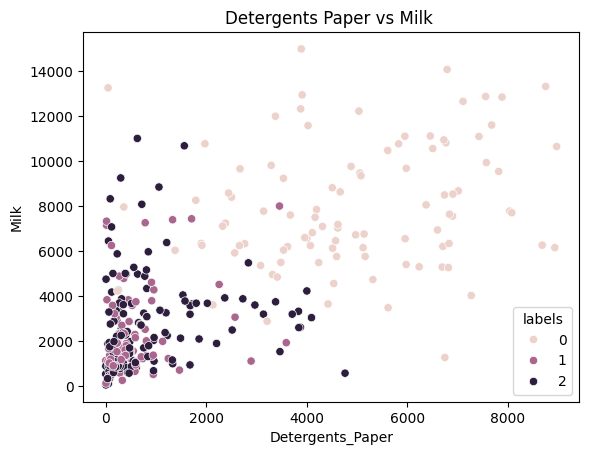

In [27]:
# Your code here:
# Function to create scatter plots for K-Means and DBSCAN
# Detergents_Paper vs Milk
plot(customers['Detergents_Paper'], customers['Milk'], customers['labels'])

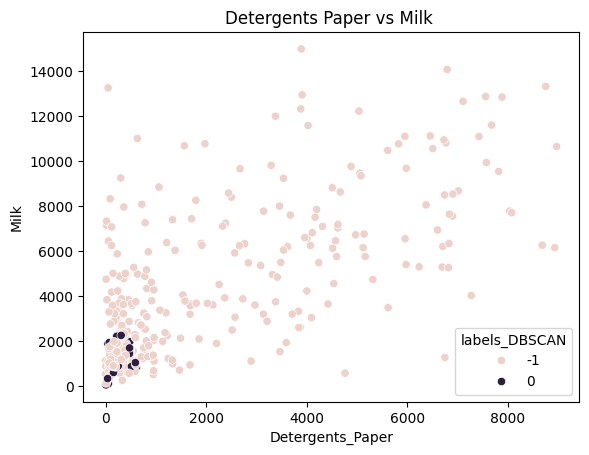

In [28]:
plot(customers['Detergents_Paper'], customers['Milk'], customers['labels_DBSCAN'])

Visualice `Grocery` como X y `Fresh` como Y mediante `labels` y `labels_DBSCAN` respectivamente

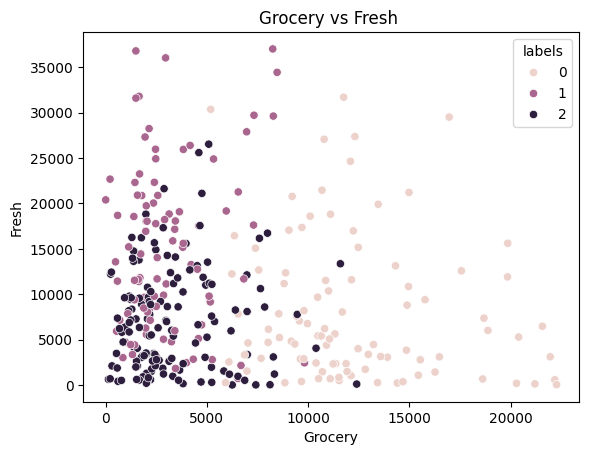

In [29]:
# Your code here:
def plot(x,y,hue):
    sns.scatterplot(x=x, 
                    y=y,
                    hue=hue)
    plt.title('Grocery vs Fresh ')
    return plt.show();

plot(customers['Grocery'], customers['Fresh'], customers['labels'])


Visualice `Frozen` como X y `Delicassen` como Y mediante `labels` y `labels_DBSCAN` respectivamente

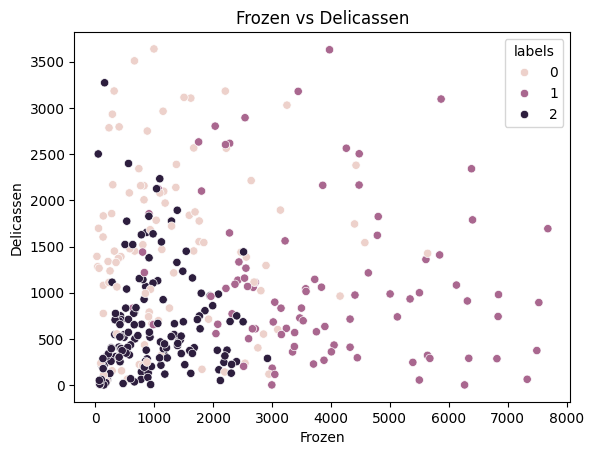

In [30]:
# Your code here:
# Your code here:
def plot(x,y,hue):
    sns.scatterplot(x=x, 
                    y=y,
                    hue=hue)
    plt.title('Frozen vs Delicassen')
    return plt.show();

plot(customers['Frozen'], customers['Delicassen'], customers['labels'])

Vamos a utilizar un groupby para ver cómo la media difiere entre los grupos. Agrupamos `customers` por `labels` y `labels_DBSCAN` respectivamente y calculamos las medias de todas las columnas.

In [31]:
# Your code here:
grouped_kmeans = customers.groupby('labels').mean()
grouped_dbscan = customers.groupby('labels_DBSCAN').mean()

print("Group by K-Means labels:")
print(grouped_kmeans)

print("\nGroup by DBSCAN labels:")
print(grouped_dbscan)

Group by K-Means labels:
         Channel    Region         Fresh         Milk       Grocery  \
labels                                                                
0       1.836735  2.642857   8027.653061  7963.826531  12169.285714   
1       1.021739  2.391304  15070.000000  2282.500000   3097.152174   
2       1.077465  2.563380   7018.211268  2623.063380   3332.225352   

             Frozen  Detergents_Paper   Delicassen     Label  labels_DBSCAN  
labels                                                                       
0       1294.836735       4915.704082  1462.581633  0.000000      -1.000000  
1       3838.141304        557.989130  1103.597826  0.978261      -1.000000  
2        975.556338        826.098592   652.450704  0.971831      -0.830986  

Group by DBSCAN labels:
                Channel    Region        Fresh         Milk      Grocery  \
labels_DBSCAN                                                              
-1             1.308442  2.503247  9952.808442  4337

¿Qué algoritmo funciona mejor?
- K-Means puede ser la mejor opción porque produce clústeres con patrones claros en las medias de las columnas.
- BSCAN puede ser más adecuado debido a su capacidad para manejar densidades variables y su robustez frente a outliers.

**Tus observaciones aquí**

El rendimiento de los algoritmos...

# Bonus Challenge 2 - Cambiar el número de clusters de K-Means

Como hemos mencionado antes, no tenemos que preocuparnos por el número de clusters con DBSCAN porque lo decide automáticamente en función de los parámetros que le enviemos. Pero con K-Means, tenemos que suministrar el parámetro `n_clusters` (si no se suministra `n_clusters`, el algoritmo utilizará `8` por defecto). Debe saber que el número óptimo de clusters varía en función del conjunto de datos. K-Means puede funcionar mal si se utiliza un número incorrecto de clusters.

En el aprendizaje automático avanzado, los científicos de datos prueban diferentes números de clusters y evalúan los resultados con medidas estadísticas (leer [aquí](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). Hoy no vamos a utilizar medidas estadísticas, sino nuestros ojos. En las celdas de abajo, experimenta con distintos números de conglomerados y visualízalos con gráficos de dispersión. ¿Qué número de clusters parece funcionar mejor para K-Means?

In [ ]:
# Your code here


**Tus observaciones aquí**

* Viendo los gráficos del k-means ...

# Bonus Challenge 3 - Cambiar `eps` y `min_samples` de DBSCAN

Experimenta cambiando los parámetros `eps` y `min_samples` de DBSCAN. Mira cómo difieren los resultados con la visualización de gráficos de dispersión.

In [ ]:
# Your code here


**Tus observaciones aquí**

    + El DBscan ajustado...
    
